In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib 

In [25]:
url = "https://raw.githubusercontent.com/vanshjaiswal/Machine-Learning-Projects/main/Project_Dataset/framingham.csv"
data = pd.read_csv(url)

In [26]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [28]:
data=data.drop('education', axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [30]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [31]:
data.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [33]:
data.fillna(data.mean(), inplace=True)

In [34]:
data.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [35]:
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [36]:
# data['sex']=data['sex'].astype(int)
data['cigsPerDay']=data['cigsPerDay'].astype(int)
data['BPMeds']=data['BPMeds'].astype(int)
data['totChol']=data['totChol'].astype(int)
data['sysBP']=data['sysBP'].astype(int)
data['diaBP']=data['diaBP'].astype(int)
data['BMI']=data['BMI'].astype(int)
data['heartRate']=data['heartRate'].astype(int)
data['glucose']=data['glucose'].astype(int)

In [37]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=27 )

In [39]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0,0,0,0,0,195,106,70,26,80,77
1,0,46,0,0,0,0,0,0,250,121,81,28,95,76
2,1,48,1,20,0,0,0,0,245,127,80,25,75,70
3,0,61,1,30,0,0,1,0,225,150,95,28,65,103
4,0,46,1,23,0,0,0,0,285,130,84,23,85,85


In [40]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg=logreg.predict(X_test)

In [43]:
#Random Forest
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

In [44]:
# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       722
           1       0.67      0.08      0.14       126

    accuracy                           0.86       848
   macro avg       0.76      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848



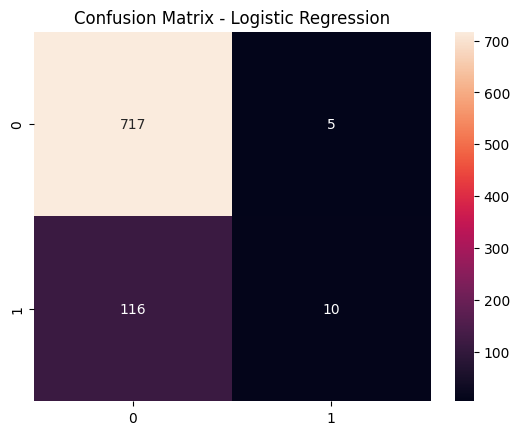

In [45]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       722
           1       0.59      0.08      0.14       126

    accuracy                           0.85       848
   macro avg       0.72      0.53      0.53       848
weighted avg       0.82      0.85      0.80       848



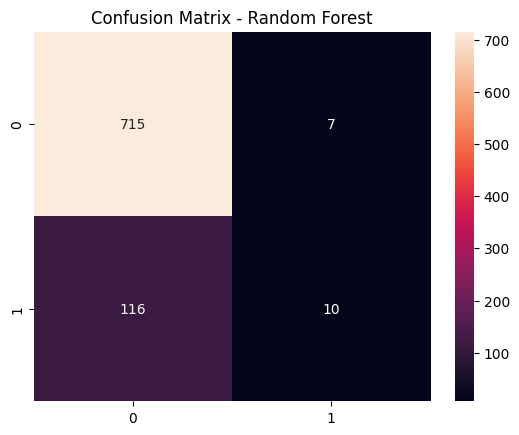

In [46]:
# Evaluate Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()

SVM:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       722
           1       0.33      0.01      0.02       126

    accuracy                           0.85       848
   macro avg       0.59      0.50      0.47       848
weighted avg       0.77      0.85      0.78       848



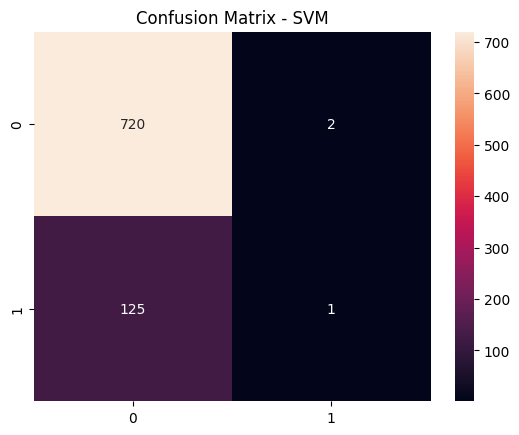

In [47]:
# Evaluate SVM
print("SVM:")
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Confusion Matrix - SVM')
plt.show()

In [48]:
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
y_pred_prob_svm = svm.predict_proba(X_test)[:,1]

In [49]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)

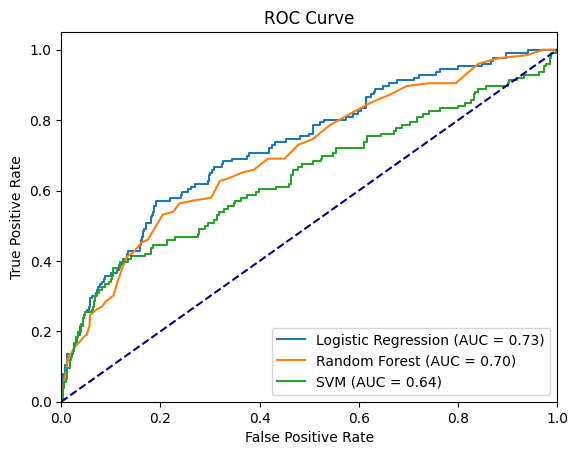

In [50]:
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_logreg, tpr_logreg)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(auc(fpr_svm, tpr_svm)))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
joblib.dump(rf, 'heart_disease_rf_model.pkl')

['heart_disease_rf_model.pkl']